<a href="https://colab.research.google.com/github/rodsei/pattern-recognition/blob/main/Reconhecimento_de_padr%C3%B5es_Semana_4_Tarefa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade da Semana 4 - Generalização

1. Escolha uma base de classificação e compare os classificadores Logistic Regression e KNN do scikit-learn.

2. Use pelo menos duas formas de avaliação e as repita pelo menos 10 vezes.

3. Calcule a média das repetições de cada avaliação.

### Download da base de dados: Abalone

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data

--2020-11-29 16:21:03--  https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 191873 (187K) [application/x-httpd-php]
Saving to: ‘abalone.data.2’

abalone.data.2      100%[===================>] 187.38K  --.-KB/s    in 0.1s    

2020-11-29 16:21:03 (1.59 MB/s) - ‘abalone.data.2’ saved [191873/191873]



### Data description:

Name / Data Type / Measurement Unit / Description

---

Sex / nominal / -- / M, F, and I (infant)

Length / continuous / mm / Longest shell measurement

Diameter / continuous / mm / perpendicular to length

Height / continuous / mm / with meat in shell

Whole weight / continuous / grams / whole abalone

Shucked weight / continuous / grams / weight of meat

Viscera weight / continuous / grams / gut weight (after bleeding)

Shell weight / continuous / grams / after being dried

Rings / integer / -- / +1.5 gives the age in years

In [2]:
import pandas as pd
import numpy as np

full_database = pd.read_csv("abalone.data",sep=",", header=None, 
                  names=["Sex", "Length", "Diameter", "Height", "Whole weight", 
                         "Shucked weight", "Viscera weight", "Shell weight", 
                         "Rings"])

full_database

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
X = np.array(full_database.drop(["Sex","Rings"], axis=1))
y = np.array(full_database["Rings"].values)

X.shape, y.shape, set(y)

((4177, 7),
 (4177,),
 {1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  29})

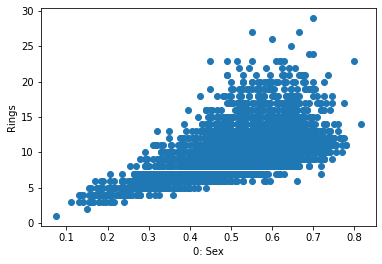

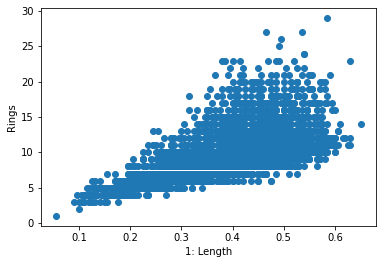

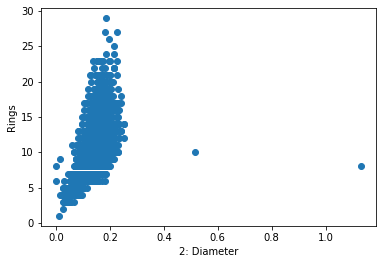

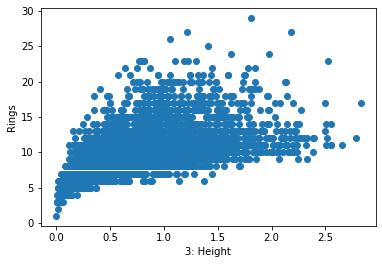

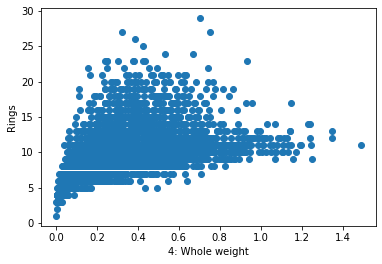

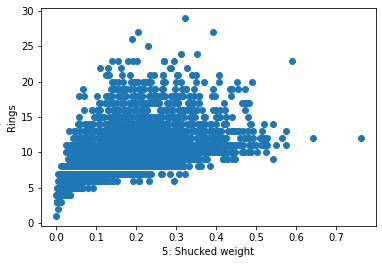

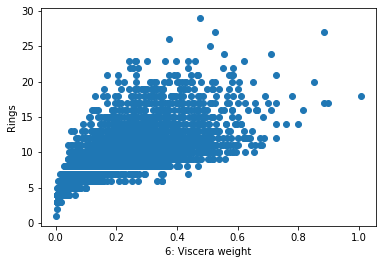

In [4]:
import matplotlib.pyplot as plt

for i in range(X.shape[1]):
  plt.xlabel(f"{i}: {full_database.keys()[i]}")
  plt.ylabel("Rings")
  plt.scatter(X[:,i], y)
  plt.show()

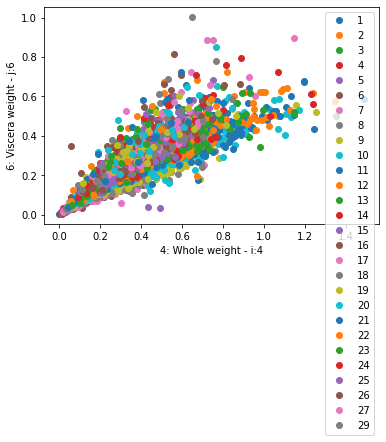

In [5]:
i,j = 4,6
#for i in range(X.shape[1]):
 # for j in range(X.shape[1]):
   # if (i != j and i != 0 and j != 0):
plt.xlabel(f"{i}: {full_database.keys()[i]} - i:{i}")
plt.ylabel(f"{j}: {full_database.keys()[j]} - j:{j}")

for k in set(y):
  plt.plot(X[:,i][y==k], X[:,j][y==k], "o", label=f"{k}")
plt.legend()
plt.show()

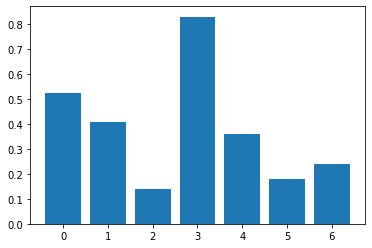

In [6]:
# AVALIANDO A DISTRIBUIÇÃO DA BASE:

import matplotlib.pyplot as plt
import numpy as np

plt.bar(list(range(0,X.shape[1])), np.mean(X, axis=0))
plt.show()

In [9]:
# DEFINIÇÃO DOS HIPERPARAMETROS COM GridSearchCV
# COMPARANDO OS CLASSIFICADORES LOGISTIC REGRESSION E KNN COM GRID SEARCH E PIPELINE
from sklearn.metrics import make_scorer, mean_squared_error, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import numpy as np

# Definindo duas métricas a serem avaliadas # os múltiplos scores não funcionaram
scorer = {'RMSE': make_scorer(mean_squared_error, greater_is_better=False, squared=False), 
         'ACC': make_scorer(accuracy_score)}


# Criando o Pipeline do KNN
pipeline_KNN = Pipeline([
      ("padronizacao", StandardScaler()),
      ("knn", KNeighborsClassifier())
])

knn_params = {'knn__n_neighbors': [3, 5, 7, 10, 15]}
knn_results = {}


# KNN SCORING
modelo_KNN = GridSearchCV(pipeline_KNN, knn_params, scoring=scorer, refit='RMSE', return_train_score=True)
scores_KNN = cross_validate(modelo_KNN, X, y, scoring=scorer, cv=10)

# KNN RESULTS
for estimator in scorer:
  media_scores_KNN = np.mean(scores_KNN[f'test_{estimator}'])
  knn_results[estimator] = {"scores": scores_KNN[f'test_{estimator}'], "mean": media_scores_KNN}

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in

In [ ]:
# Criando o Pipeline do Logistic Regression
pipeline_LR = Pipeline([
      ("padronizacao", StandardScaler()),
      ("logr", LogisticRegression(max_iter=1000))
])

logr_params = {'logr__max_iter': [500, 600, 700]}
logr_results = {}

# LOGISTIC REGRESSION SCORING
modelo_LR = GridSearchCV(pipeline_LR, logr_params, scoring=scorer, refit='RMSE', return_train_score=True)
scores_LR = cross_validate(modelo_LR, X, y, scoring=scorer, cv=10)

# LOGR RESULTS
for estimator in scorer: 
  media_scores_LR = np.mean(scores_LR[f'test_{estimator}'])
  logr_results[estimator] = {"scores": scores_LR[f'test_{estimator}'], "mean": media_scores_LR}

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-pa

In [15]:
# LOGR RESULTS
for estimator in scorer: 
  media_scores_LR = np.mean(scores_LR[f'test_{estimator}'])
  logr_results[estimator] = {"scores": scores_LR[f'test_{estimator}'], "mean": media_scores_LR}

KNN {'RMSE': {'scores': array([-2.86623638, -2.6024464 , -2.77807548, -2.58399564, -2.40712658,
       -2.74123222, -2.64755914, -2.65660572, -2.64121547, -2.54173792]), 'mean': -2.6466230954483945}, 'ACC': {'scores': array([0.17703349, 0.22488038, 0.25119617, 0.27990431, 0.26555024,
       0.23444976, 0.27751196, 0.23980815, 0.27338129, 0.26139089]), 'mean': 0.2485106651520889}}

LogR {'RMSE': {'scores': array([-2.67408259, -2.40314786, -2.60152697, -2.52783547, -2.36045977,
       -2.61985426, -2.49401197, -2.54550905, -2.52137148, -2.42241729]), 'mean': -2.517021670565994}, 'ACC': {'scores': array([0.21052632, 0.27990431, 0.27990431, 0.29665072, 0.27990431,
       0.26076555, 0.284689  , 0.25179856, 0.29016787, 0.29256595]), 'mean': 0.27268768717083747}}


In [22]:
# COMPARANDO OS RESULTADOS DOS CLASSIFICADORES
print(f"KNN -> média RMSE: {knn_results['RMSE']['mean']}")
print(f"KNN -> média Accuracy: {knn_results['ACC']['mean']}")
print()
print(f"LogR -> média RMSE: {logr_results['RMSE']['mean']}")
print(f"LogR -> média Accuracy: {logr_results['ACC']['mean']}")

KNN -> média RMSE: -2.6466230954483945
KNN -> média Accuracy: 0.2485106651520889

LogR -> média RMSE: -2.517021670565994
LogR -> média Accuracy: 0.27268768717083747
